# Traitement du Signal - TP3 : Transformée de Fourier

---

Aujourd'hui, place à la transformée de Fourier. On va voir étape par étape comment faire une bonne transformée de Fourier, sa transformée inverse, tout ça sur des signaux réels et complexes.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exercice 1 : Signal réel

On commence tranquillement, avec un signal simple réel : une sinusoïde. 

\begin{equation*}
    s(t) = A  \sin(2 \pi f_{0} t)
\end{equation*}

Avec $A = 1$ et $f_{0} = 50 Hz$.

Etant donné qu'on travaille en numérique, il nous faut un axe temporel. Le signal évoluera de 0 à 0.1 secondes avec une fréquence d'échantillonage $f_e = 5000 Hz$.

Construisez l'axe temporel, le signal sinusoïdal et tracez tout ça.

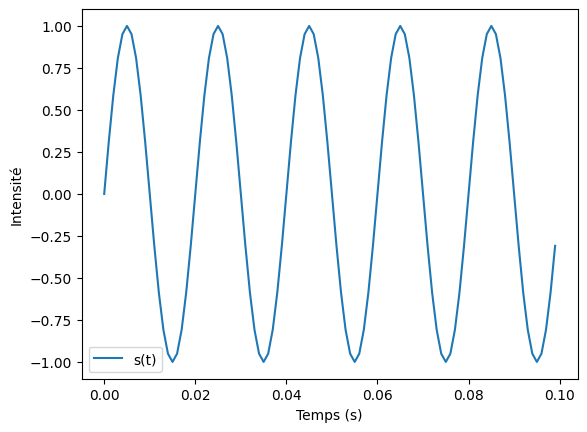

In [2]:
# A COMPLETER
# Création de l'axe temporel
T = 0.1 # Durée du signal
fe = 1000 # Fréquence d'échantillonage
t = np.arange(0,T,1/fe)

# Création du signal sinuisoïdal
A = 1 # Amplitude
f0 = 50 # Fréquence de la sinusoïde
s = A*np.sin(2*np.pi*f0*t)

# Afficage du signal
plt.figure()
plt.plot(t,s,label="s(t)")
plt.xlabel("Temps (s)")
plt.ylabel("Intensité")
plt.legend()
plt.show()

**_QUESTION :_** Avant de faire notre première FFT via NumPy, quelle est l'allure attendue du spectre d'amplitude de $S(f)$ ? Et celle du spectre de phase ?

**_REPONSE :_** On n'a pas besoin de faire de décomposition en série de Fourier ici puisque le signal est sinusoïdal. A partir de la formule, on sait que :
- Dans le spectre d'amplitude, on aura un pic à $f_0$ de taille $A$
- Dans le spectre de phase, on aura un pic à $f_0$ de taille $\frac{-\pi}{2}$

Ok, il est l'heure de sauter le pas. On va enfin faire notre première FFT ! Je sais, l'excitation est palpable !

Pour cela, nous allons nous appuyer sur la package *numpy.fft*, qui propose plein de fonctions pour réaliser facilement les transformées de Fourier et autre (oui, je ne vous fait pas coder la FFT de A à Z aujourd'hui, je ne suis pas taré non plus). 

La documentation du package du jour : https://numpy.org/doc/2.0/reference/routines.fft.html

Notre signal étant réel, nous allons utiliser deux fonctions :
- *rfft*
- *rfftfreq*

**_QUESTION :_** Que font ces deux fonctions ? Que prennent-elles en entrée et qu'est-ce qu'elles retournent ?

**_REPONSE :_** 
- *rfft* : La fonction calcule la transformée de Fourier pour un tableau 1D réel, en utilisant l'algorithme *Fast Fourier Transform*. La fonction prend en entrée un tableau $a$, et quelques paramètres optionnels : 
    - $n$ : Le nombre de points de $a$ à prendre en compte. Si $n > len(a)$, le signal est paddé avec des 0
    - *axis* : L'axe du tableau pour performer la FFT (si le tableau n'est pas à une dimension)
    - *norm* : Le mode de la normalisation, avec plusieurs options possibles. Par défaut, le paramètres est à *backward*.
*rfft* retourne le tableau *out* qui est le résultat de la FFT réelle discrète.

- *rfftfreq* : La fonction retourne les fréquences d'échantillonage de la transformée de Fourier discrète réelle. Cela permet notamment de calculer l'axe fréquentiel du résultat de *rfft*. La fonction prend en entrée :
    - *n* : La taille de la fenêtre (c'est-à-dire ici la longueur du signal dans notre cas)
    - *d* : le temps d'échantillonage de notre fenêtre
*rfftfreq* retourne le tableau *f* correspondant aux fréquences d'échantillonage, ce qui constitue notre axe fréquentiel.

Calculez la transformée de Fourier réelle $S(f)$ de notre signal $s(t)$, et son axe fréquentiel. Extrayez ensuite le spectre d'amplitude et le spectre de phase et tracez les résultats obtenus.

*Note :* Pour tracez les spectres ici, évitez *plot* car le résultat théorique ne convient pas vraiment à ce type d'affichage. Préférez un affichage en barre avec *stem*.

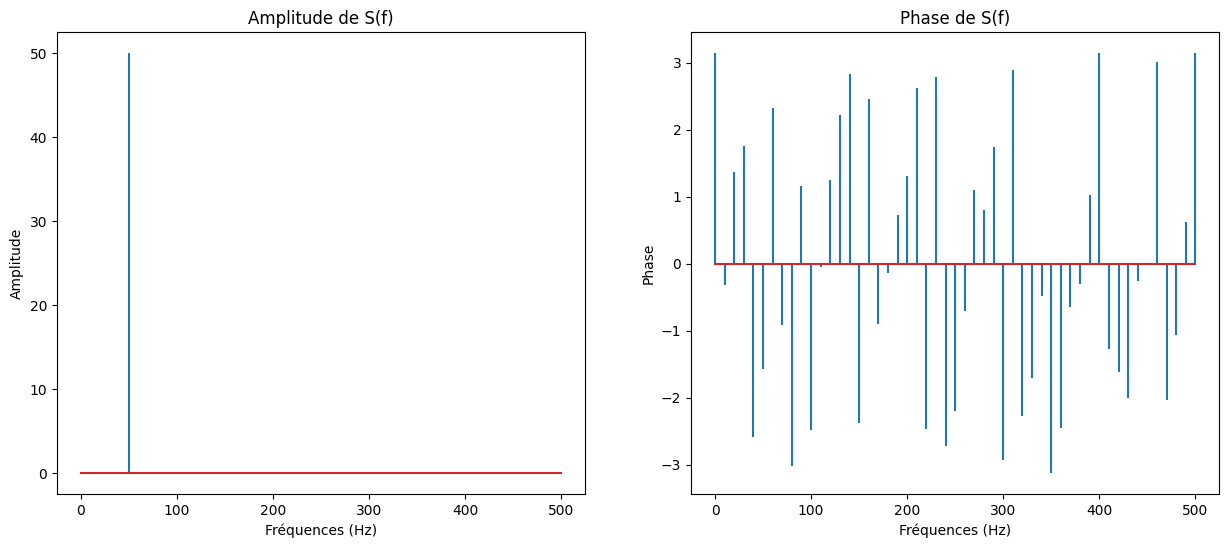

In [3]:
# A COMPLETER
# Transformée de Fourier réelle du signal s(t)
S = np.fft.rfft(s) # Calcul de la FFT réelle du signal
freq_S = np.fft.rfftfreq(len(s),1/fe) # Calcul de l'axe fréquentiel de la FFT

amplitude_S = np.abs(S) # Récupération du module de S
phase_S = np.angle(S) # Récupération de la phase de S


plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_S, amplitude_S, markerfmt=" ")
plt.title("Amplitude de S(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_S, phase_S, markerfmt=" ")
plt.title("Phase de S(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

Normalement, vous devriez avoir comme graphiques ceux de l'image *S_RFFT_avant_correction.png*. Cependant, le résultat n'est pas très satifaisant par rapport à la théorie :

- Le spectre d'amplitude ressemble à ce qu'on devrait avoir, mais le pîc à $f_0$ est d'une amplitude trop grande (amplitude de 50 au lieu de $A=1$)
- Dans le spectre de phase, on a beaucoup de pics, positifs comme négatifs. Le pic à $f_0$ est en revanche bien à $-\frac{\pi}{2}$

Il y a en effet des corrections à apporter, c'est normal :
- Pour le spectre d'amplitude, cela est dû au calcul de la RFFT qui n'est pas normalisé. Il faut pour cela multiplier par $2/N$ avec $N$ la longueur du signal.
- Pour le spectre de phase, les nombreux pics sont calculés avec une amplitude nulle, donc il faut les ignorer (résultat pas pertinent). De ce fait, il ne faut garder uniquement les phases aux fréquences dont l'amplitude est supérieure à 1% de l'amplitude max obtenue.

Corrigez vos deux graphes avec les indications données ci-dessus.

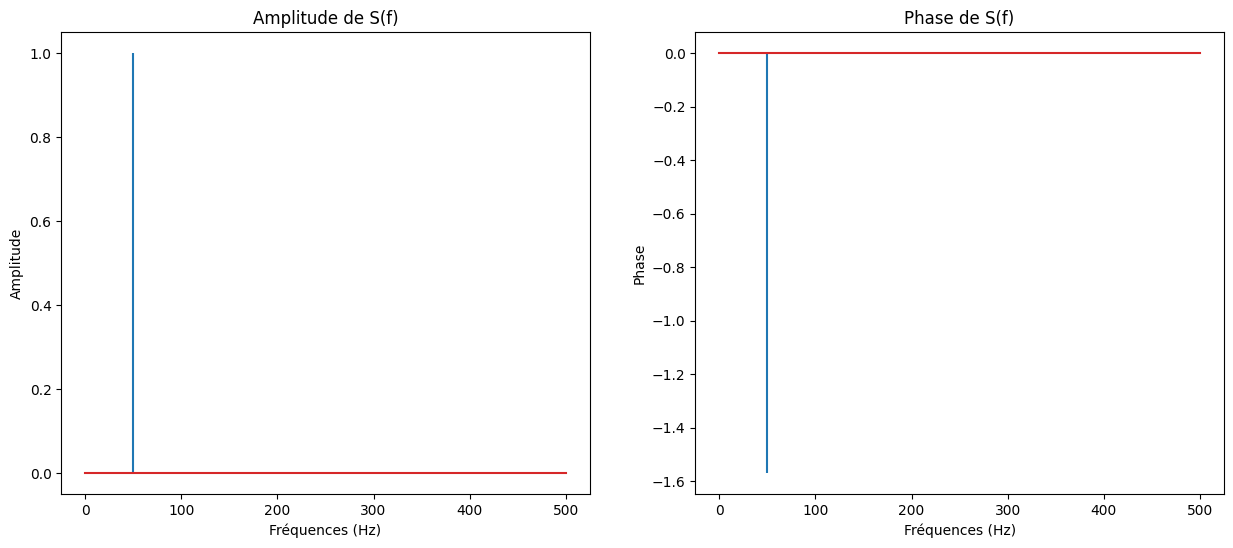

In [4]:
# A COMPLETER
# Correction des graphes d'amplitudes et de phase de s(t)

amplitude_S = np.abs(S) *2/len(s) # Correction de l'amplitude avec le facteur de normalisation

phase_S = np.angle(S) # Récupération de la phase de S
phase_S[amplitude_S<0.01*phase_S.max()] = 0 # Correction de la phase en mettant à zéro les points où l'amplitude est inférieure à 1% du max de l'amplitude

# Affichage des spectres corrigés
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_S, amplitude_S, markerfmt=" ")
plt.title("Amplitude de S(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_S, phase_S, markerfmt=" ")
plt.title("Phase de S(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

Si tout est ok, vous devriez avoir les mêmes graphes que ceux de l'image *S_RFFT_apres_correction.png*. Une dernière étape maintenant : on va faire une transformée de Fourier inverse de notre signal $S(f)$, afin de retrouver notre signal d'origine $s(t)$. Pour cela, trouvez la fonction à utiliser dans la documentation du package *numpy.fft*.

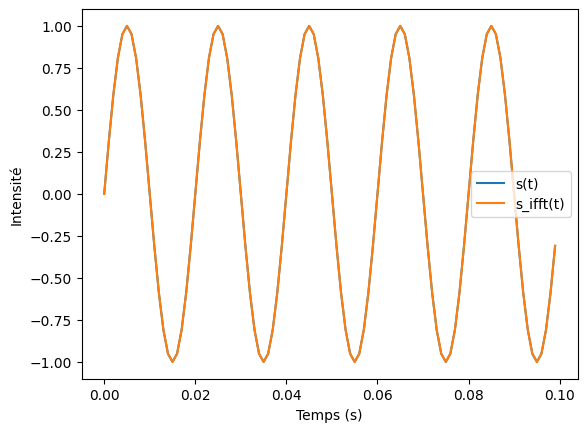

In [5]:
# A COMPLETER
# Transformée de Fourier inverse réelle du signal S(f)
s_ifft = np.fft.irfft(S)

# Affichage du signal s(t) d'origine et celui après transformée de Fourier inverse
plt.figure()
plt.plot(t,s,label='s(t)')
plt.plot(t,s_ifft,label='s_ifft(t)')
plt.legend()
plt.xlabel("Temps (s)")
plt.ylabel("Intensité")
plt.show()

Normalement, vous devriez retrouver **exactement** le même signal que celui d'origine (à $1e^{-15}$ près). 

---

## Exercice 2 : Ca devient plus... complexe...

On va refaire les mêmes opérations que durant le précédent exercice, mais cette fois avec un signal complexe:

\begin{equation*}
    x(t) = A e^{j (2 \pi f_0 t- \frac{\pi}{2})}
\end{equation*}

Avec $A=1$, $f_0=50 Hz$. Le signal évoluera de 0 à 0.1 secondes avec une fréquence d'échantillonage $f_e = 1000 Hz$. 

Construisez le signal x avec son axe temporel, et sachant qu'il est complexe, tracez en deux sous-figures la partie réelle et la partie imaginaire.

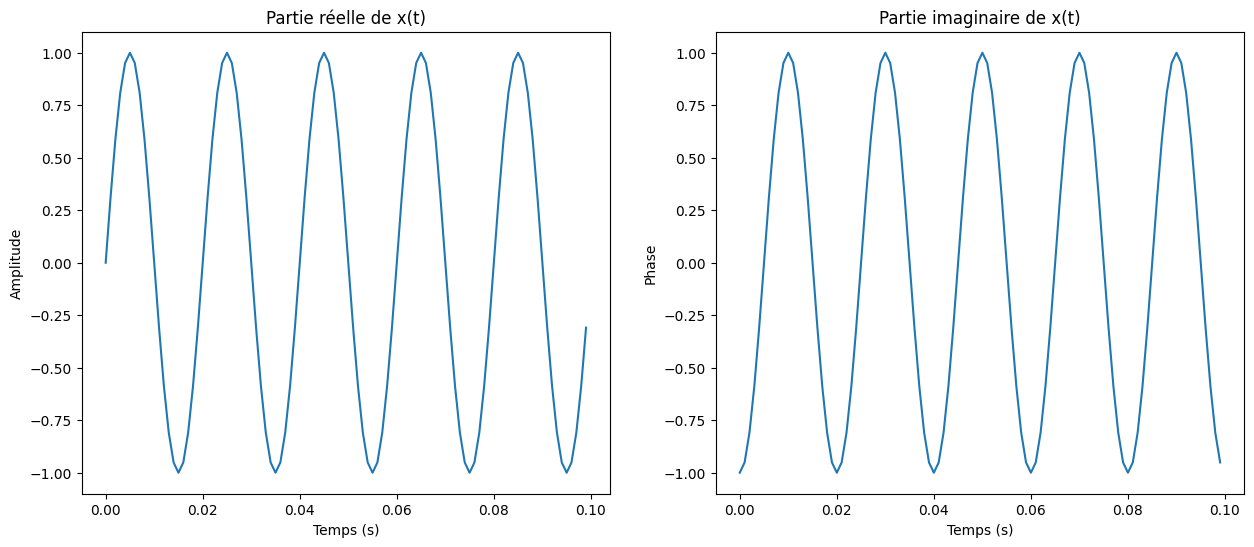

In [6]:
# A COMPLETER
# Création de l'axe temporel
T = 0.1
fe = 1000
t = np.arange(0,T,1/fe)

# Création du signal complexe x
A = 1
f0 = 50
x = A*np.exp(1j*(2*np.pi*f0*t-np.pi/2))

# Affichage du module et de la phase de x(t)

real_x = np.real(x)
imag_x = np.imag(x)

plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.plot(t,real_x)
plt.title("Partie réelle de x(t)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.plot(t,imag_x)
plt.title("Partie imaginaire de x(t)")
plt.xlabel("Temps (s)")
plt.ylabel("Phase")
plt.show()

**_QUESTION :_** Quelle est l'allure attendue du spectre d'amplitude de $X(f)$ ? Et celle du spectre de phase ?

**_REPONSE :_** Le signal étant périodique, et que la DSF est déjà faite, on sait donc déjà de X(f) que:
- Dans le spectre d'amplitude, on aura un pic à $f_0$ de taille $A$
- Dans le spectre de phase, on aura un pic à $f_0$ de taille $\frac{-\pi}{2}$

Pour réaliser une FFT avec un signal complexe, il faut utiliser d'autres fonctions que celles utilisées précédemment:
- *fft*
- *fftfreq*
- *fftshift*

**_QUESTION :_** Comme précédemment, décrivez le fonctionnement des fonctions citées ci-dessus, en les comparant avec leurs homologues réels.

**_REPONSE :_** 
- *fft* : La fonction calcule la transformée de Fourier pour un tableau 1D. Elle fonctionne de la même manière que *rfft* sauf qu'elle calcule aussi pour des fréquences négatives.
- *fftfreq* : La fonction retourne les fréquences d'échantillonage de la transformée de Fourier discrète, comme pour *rfftfreq*. Cependant, contrairement à son homologue réel, la fonction renvoit également les fréquences d'échantillonages négatives.
- *fftshift* : La fonction a pour objectif de replacer les vecteurs issus de *fftfreq* ou *fft* afin que la fréquence à 0 Hz soit centrale. Ce décalage à faire est issu de la méthode de calcul de la FFT, qui renvoie les résutlats d'abord pour les fréquences positives, puis négatives.

A vous de faire la FFT sur x(t), avec les corrections à apporter pour replacer l'amplitude (avec un facteur de $1/N$ cette fois), et afficher uniquement les phases là où l'amplitude est supérieure à 1% du maximum. Tracez ensuite l'amplitude et la phase de X(f).

freq_X avant shift : [   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490. -500. -490. -480. -470. -460. -450. -440. -430. -420. -410.
 -400. -390. -380. -370. -360. -350. -340. -330. -320. -310. -300. -290.
 -280. -270. -260. -250. -240. -230. -220. -210. -200. -190. -180. -170.
 -160. -150. -140. -130. -120. -110. -100.  -90.  -80.  -70.  -60.  -50.
  -40.  -30.  -20.  -10.]
freq_X après shift : [-500. -490. -480. -470. -460. -450. -440. -430. -420. -410. -400. -390.
 -380. -370. -360. -350. -340. -330. -320. -310. -300. -290. -280. -270.
 -260. -250. -240. -230. -220. -210. -200. -190. -180. -170. -160. -150.
 -140. -130. -120. -110. -100.  -90.  -80.  -70.  -60.  -50.  -40.  -30.
  -20.  -10.    0.   10.   20.   30.   40.   50.   60.  

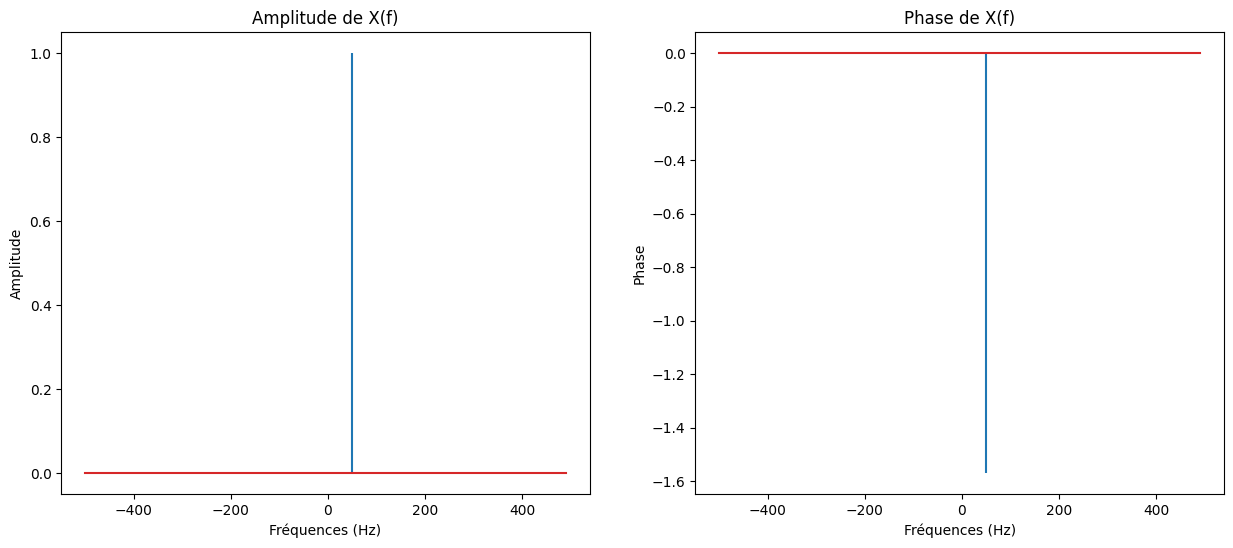

In [7]:
# A COMPLETER
# Transformée de Fourier du signal x(t)
X = np.fft.fft(x) # Calcul de la FFT du signal
freq_X = np.fft.fftfreq(len(x),1/fe) # Calcul de l'axe fréquentiel de la FFT
print(f"freq_X avant shift : {freq_X}")

# Shift de X et de freq_X pour centrer la fréquence à 0
X = np.fft.fftshift(X)
freq_X = np.fft.fftshift(freq_X)
print(f"freq_X après shift : {freq_X}")

amplitude_X = np.abs(X) / len(X) # Récupération du module de X
phase_X = np.angle(X) # Récupération de la phase de X
phase_X[amplitude_X<0.01*amplitude_X.max()] = 0

# Affichage des spectres
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_X, amplitude_X, markerfmt=" ")
plt.title("Amplitude de X(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_X, phase_X, markerfmt=" ")
plt.title("Phase de X(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

Si vous avez bien calculé la FFT (*X_FFT.png* pour comparer vos graphes), vous devriez avoir des spectres d'amplitude et de phase similaires à... $S(f)$. Alors pourquoi ?

Cela est dû à la différence entre la FFT réelle et la FFT classique : 
- Pour la FFT classique, on calcule et montre les spectres sur les fréquences positives et négatives.
- Pour la FFT réelle, on calcule et montre les spectres **uniquement** sur les fréquences positives. Théoriquement, on a des pics dans les fréquences négatives (cf. les propriétés d'une transformée de Fourier pour un signal réel), mais dans le cadre de traitement de signaux réels, on les ignore, on n'en a pas besoin, car on souhaite avoir un résultat uniquement réel.

Reprenez votre code en calculant cette fois la transformée de Fourier classique (via *fft*) avec votre signal $s(t)$ afin de voir les spectres d'amplitude et de phase dans les fréquences négatives.

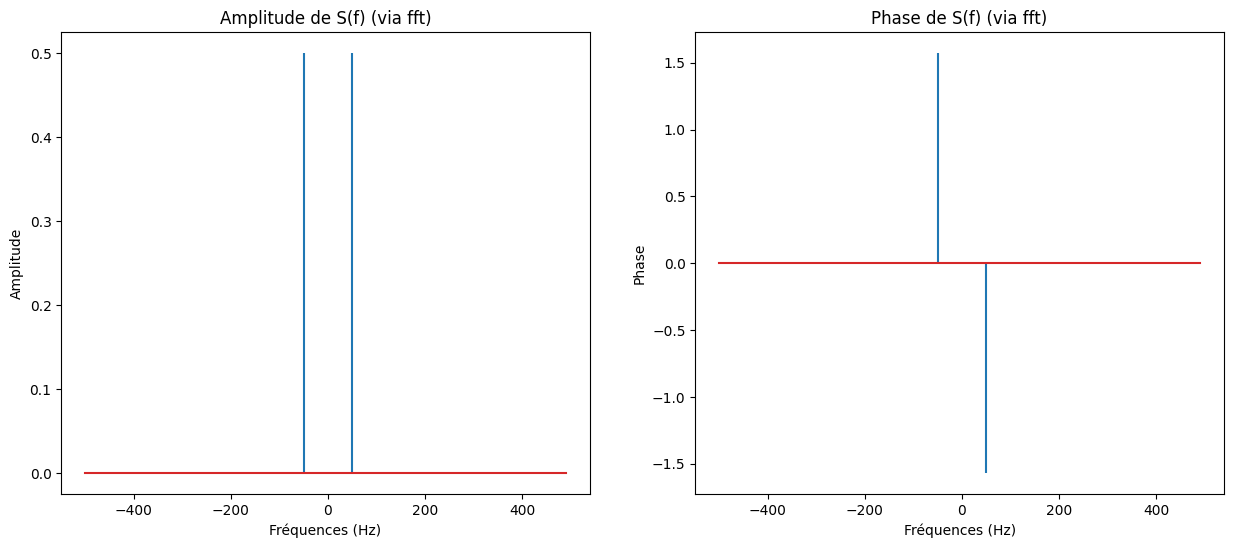

In [8]:
# A COMPLETER
# Transformée de Fourier du signal s(t)
S = np.fft.fft(s) # Calcul de la FFT du signal
freq_S = np.fft.fftfreq(len(s),1/fe) # Calcul de l'axe fréquentiel de la FFT

# Shift de S et de freq_S pour centrer la fréquence à 0
S = np.fft.fftshift(S)
freq_S = np.fft.fftshift(freq_S)

amplitude_S = np.abs(S) / len(S) # Récupération du module de S
phase_S = np.angle(S) # Récupération de la phase de S
phase_S[amplitude_S<0.01*amplitude_S.max()] = 0

plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_S, amplitude_S, markerfmt=" ")
plt.title("Amplitude de S(f) (via fft)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_S, phase_S, markerfmt=" ")
plt.title("Phase de S(f) (via fft)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

L'apartée sur le signal $s(t)$ est terminée. Vous pouvez comparez vos graphes avec l'image *S_FFT.png*.

Il nous reste à faire la FFT inverse du signal $X(f)$ pour retrouver notre signal d'origine. Pour cela, vous allez utilisez les fonctions *ifft* et *ifftshift*. Comme précédemment, faites la FFT inverse de $X(f)$ et affichez $x(t)$ (partie réelle et partie imaginaire).

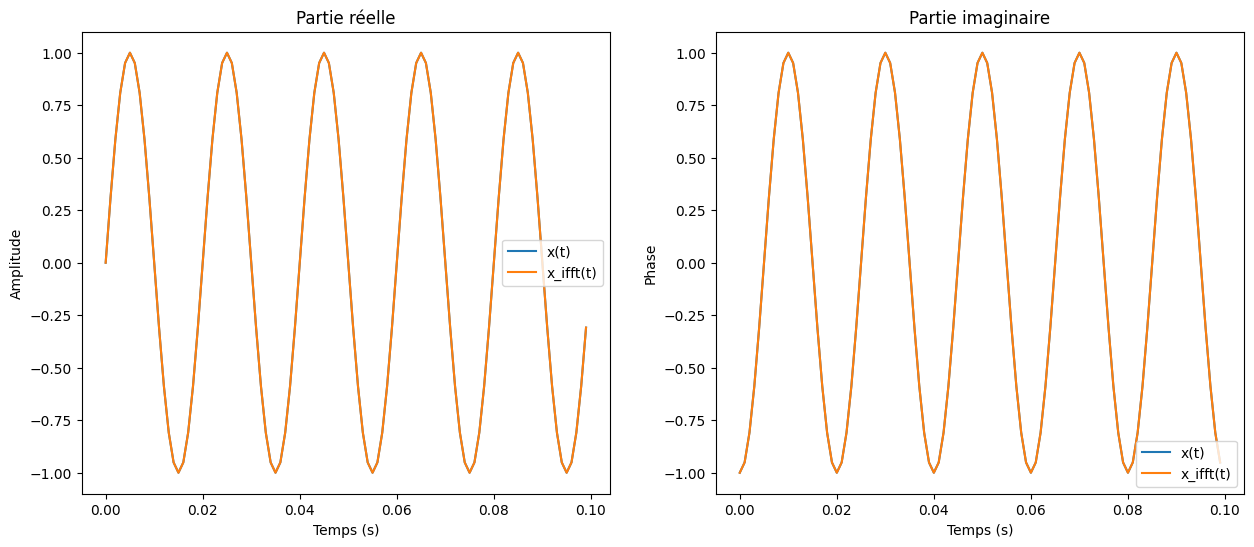

In [9]:
# A COMPLETER
# Transformée de Fourier inverse du signal X(f)
# ATTENTION : IL FAUT D'ABORD REDECALER LE SIGNAL AVEC IFFTSHIFT
x_ifft = np.fft.ifft(np.fft.ifftshift(X))

# Affichage du signal x(t) d'origine et celui après transformée de Fourier inverse

real_x_ifft = np.real(x_ifft)
imag_x_ifft = np.imag(x_ifft)

plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.plot(t, real_x, label="x(t)")
plt.plot(t, real_x_ifft, label="x_ifft(t)")
plt.title("Partie réelle")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.subplot(122)
plt.plot(t, imag_x, label="x(t)")
plt.plot(t, imag_x_ifft, label="x_ifft(t)")
plt.title("Partie imaginaire")
plt.xlabel("Temps (s)")
plt.ylabel("Phase")
plt.legend()
plt.show()

---

## Exercice 3 : Va falloir appeler un plombier je crois...

Dans cet exercice très rapide, on va utiliser le signal $y(t)$, qui est le même signal que $x(t)$ avec cette fois une fréquence $f_0 = 51 Hz$. Construisez le signal, l'axe temporel et affichez-le signal (partie réelle et complexe).

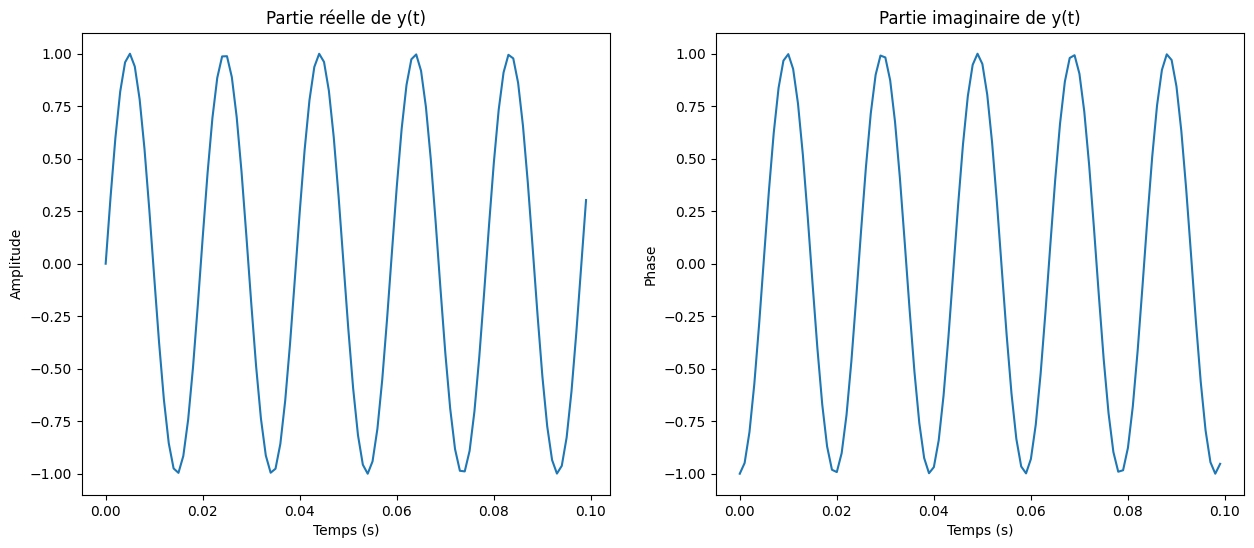

In [10]:
# A COMPLETER
# Création de l'axe temporel
T = 0.1
fe = 1000
t = np.arange(0,T,1/fe)

# Création du signal complexe y
A = 1
f0 = 51
y = A*np.exp(1j*(2*np.pi*f0*t-np.pi/2))

# Affichage du module et de la phase de y(t)
real_y = np.real(y)
imag_y = np.imag(y)

plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.plot(t,real_y)
plt.title("Partie réelle de y(t)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.plot(t,imag_y)
plt.title("Partie imaginaire de y(t)")
plt.xlabel("Temps (s)")
plt.ylabel("Phase")
plt.show()

Calculez la FFT de $y(t)$, et affichez les spectres d'amplitude et de phase de $Y(f)$

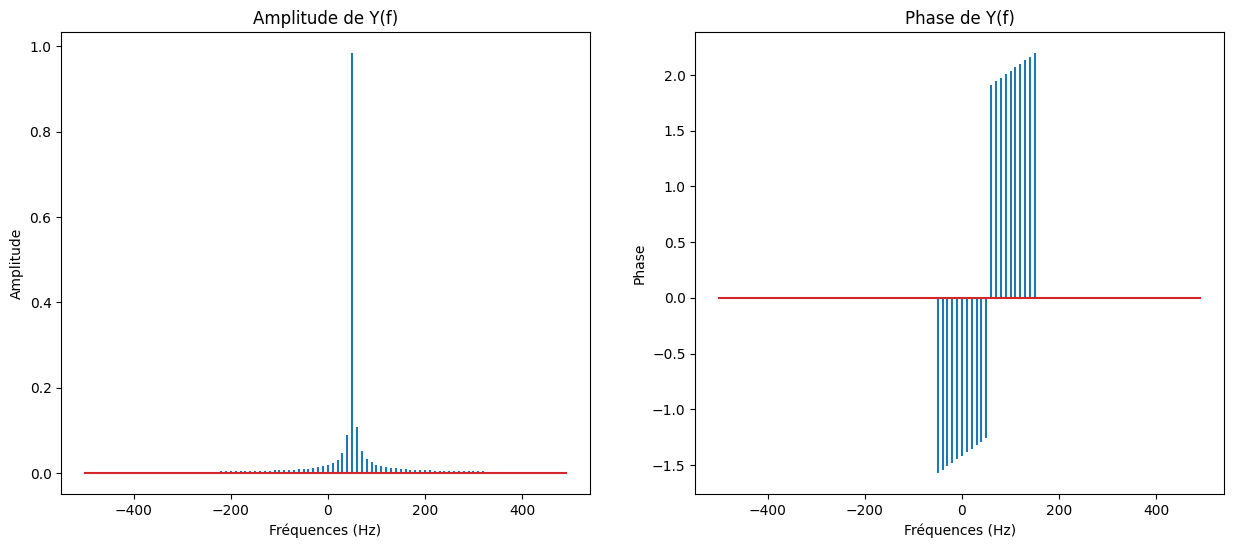

In [11]:
# A COMPLETER
# Transformée de Fourier du signal y(t)
Y = np.fft.fft(y) # Calcul de la FFT du signal
freq_Y = np.fft.fftfreq(len(y),1/fe) # Calcul de l'axe fréquentiel de la FFT

# Shift de Y et de freq_Y pour centrer la fréquence à 0
Y = np.fft.fftshift(Y)
freq_Y = np.fft.fftshift(freq_Y)

amplitude_Y = np.abs(Y) / len(Y) # Récupération du module de Y
phase_Y = np.angle(Y) # Récupération de la phase de Y
phase_Y[amplitude_Y<0.01*amplitude_Y.max()] = 0

# Affichage des spectres
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_Y, amplitude_Y, markerfmt=" ")
plt.title("Amplitude de Y(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_Y, phase_Y, markerfmt=" ")
plt.title("Phase de Y(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

**_QUESTION :_** Que constatez-vous ? Est-ce que le résultat est en raccord avec ce qu'on devrait avoir théoriquement ?

**_REPONSE :_** On obtient un résultat différent. Normalement, on devrait avoir un pic unique à 51Hz de taille 1 en amplitude, et un pic unique à 51 Hz à $\frac{-\pi}{2}$ en phase. On retrouve le pic attendu en amplitude, proche de 1, mais avec d'autres pics autours différents de 0. Pour la phase, le spectre résultant n'a rien à voir avec celui attendu.

Ce cas illustre la problématique de **fuite spectrale** (vous verrez ça dans quelques semaines en CM). Cela est dû à la nature de la FFT : nous ne faisons pas une transformée de Fourier mais une **transformée de Fourier discrète (DFT)**. Cette opération a quelques limitations au niveau du calcul en fonction du signal d'entrée. L'idée ici ne va pas être de corriger (on verra ça plus tard potentiellement), mais d'identifier le soucis.

**_QUESTION :_** Pour quelle raison avons-nous une fuite spectrale ici ? Quelle est la cause de cette fuite ?

*Note : Un indice pour identifier le problème : avez-vous regardé en détail votre axe spectral ?*

In [12]:
print(f"Axe spectral de Y(f) : {freq_Y}")

Axe spectral de Y(f) : [-500. -490. -480. -470. -460. -450. -440. -430. -420. -410. -400. -390.
 -380. -370. -360. -350. -340. -330. -320. -310. -300. -290. -280. -270.
 -260. -250. -240. -230. -220. -210. -200. -190. -180. -170. -160. -150.
 -140. -130. -120. -110. -100.  -90.  -80.  -70.  -60.  -50.  -40.  -30.
  -20.  -10.    0.   10.   20.   30.   40.   50.   60.   70.   80.   90.
  100.  110.  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.
  220.  230.  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.
  340.  350.  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.
  460.  470.  480.  490.]


**_REPONSE :_** La raison de cette fuite spectrale est liée à notre axe spectral. Les fréquences de la grille fréquentielle vont de 500 Hz à 500 Hz ($-\frac{f_e}{2}$ à $\frac{f_e}{2}$), avec un pas de 10 Hz (à savoir $\frac{f_e}{N}$ avec $N$ le nombre d'échantillons temporels, donc la longueur de l'axe temporel). De ce fait, on retrouve dans cette grille les fréquences 50 Hz, 60 Hz mais pas 51 Hz, ce qui explique cette imprécision sur les spectres d'amplitude et de phase, et donc cette fuite spectrale.

Appliquez la transformée de Fourier inverse sur $Y(f)$ pour repasser en temporel, et comparez le résultat avec le signal $y(t)$ d'origine en traçant les parties réelles et imaginaires sur un même graphe.

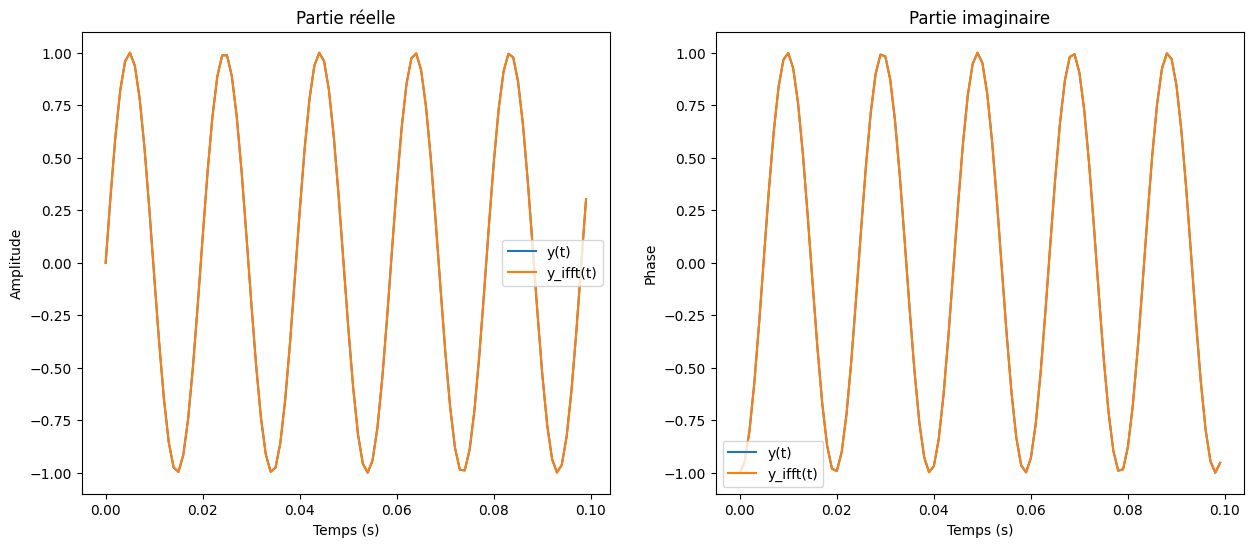

In [13]:
# A COMPLETER
# Transformée de Fourier inverse du signal Y(f)
y_ifft = np.fft.ifft(np.fft.ifftshift(Y))

# Affichage du signal y(t) d'origine et celui après transformée de Fourier inverse
real_y_ifft = np.real(y_ifft)
imag_y_ifft = np.imag(y_ifft)

plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.plot(t, real_y, label="y(t)")
plt.plot(t, real_y_ifft, label="y_ifft(t)")
plt.title("Partie réelle")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.subplot(122)
plt.plot(t, imag_y, label="y(t)")
plt.plot(t, imag_y_ifft, label="y_ifft(t)")
plt.title("Partie imaginaire")
plt.xlabel("Temps (s)")
plt.ylabel("Phase")
plt.legend()
plt.show()

**_QUESTION :_** Est-ce que la fuite spectrale a altéré le signal temporel après FFT inverse ?

**_REPONSE :_** Non, on ne voit pas de différence entre le signal original et celui issue de la FFT inverse de $Y(f)$. Cela s'explique par la nature de la DFT qui est parfaitement réversible, même avec le phénomène de fuite spectrale.

---
## Exercice 4 : Plein de sinus ! Pleinn de cosinus !

Pour cet exercice, reprenez le signal s(t) de l'exercice 1, et son axe temporel. Effectuez une FFT réelle sur ce signal et affichez les spectres d'amplitude et de phase.

\begin{equation*}
    s(t) = A  \sin(2 \pi f_{0} t)
\end{equation*}

*Note : rien de compliqué là, c'est du CTRL+C CTRL+V de l'exercice 1...*

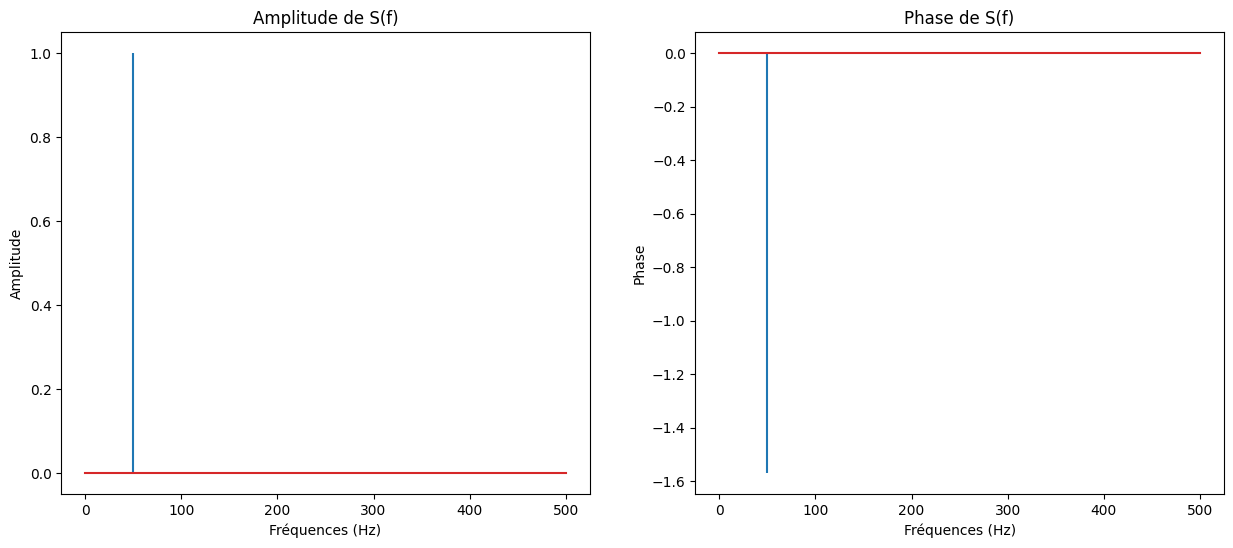

In [14]:
# A COMPLETER
# Création de l'axe temporel
T = 0.1 # Durée du signal
fe = 1000 # Fréquence d'échantillonage
t = np.arange(0,T,1/fe)

# Création du signal sinuisoïdal
A = 1 # Amplitude
f0 = 50 # Fréquence de la sinusoïde
s = A*np.sin(2*np.pi*f0*t)

# Transformée de Fourier réelle du signal s(t)
S = np.fft.rfft(s) # Calcul de la FFT réelle du signal
freq_S = np.fft.rfftfreq(len(s),1/fe) # Calcul de l'axe fréquentiel de la FFT

amplitude_S = np.abs(S) *2/len(s) # Correction de l'amplitude avec le facteur de normalisation

phase_S = np.angle(S) # Récupération de la phase de S
phase_S[amplitude_S<0.01*phase_S.max()] = 0 # Correction de la phase en mettant à zéro les points où l'amplitude est inférieure à 1% du max de l'amplitude

# Affichage des spectres de S(f)
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_S, amplitude_S, markerfmt=" ")
plt.title("Amplitude de S(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_S, phase_S, markerfmt=" ")
plt.title("Phase de S(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

On va s'amuser à modifier les spectres de $S(F)$ pour créer un nouveau signal $s'(t)$ : 

\begin{equation*}
    s'(t) = A  \sin(2 \pi f_{0} t) + B \cos(2 \pi f_{1} t) + C \cos(2 \pi f_{2} t + \frac{\pi}{4})
\end{equation*}

Avec $B=3$, $C=2$, $f_1 = 20Hz$ et $f_2=10Hz$  

Modifiez les spectres d'amplitude et de phase pour correspondre au signal $s'(t)$, et affichez les nouveaux spectre.

*Note : Attention aux corrections de visualisation qu'on faisait pour les spectres d'amplitude et de phase...*

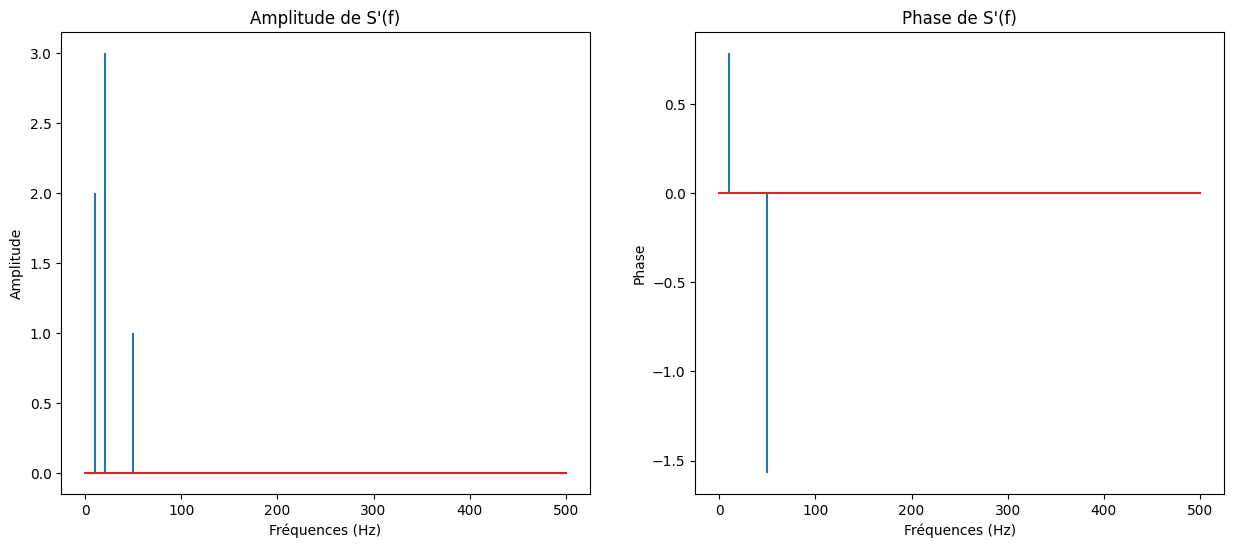

In [15]:
# A COMPLETER
# Modification des spectres pour avoir S'(f)

B=3
C=2
f1=20
f2=10

amplitude_S_prime = np.abs(S)
phase_S_prime = np.angle(S)

amplitude_S_prime[freq_S==f1] = B/2*len(t)
amplitude_S_prime[freq_S==f2] = C/2*len(t)

phase_S_prime[freq_S==f1] = 0
phase_S_prime[freq_S==f2] = np.pi/4

amplitude_S_prime_visualisation = amplitude_S_prime *2/len(s) 

phase_S_prime_visualisation = phase_S_prime
phase_S_prime_visualisation[amplitude_S_prime_visualisation<0.01*phase_S_prime_visualisation.max()] = 0 

# Affichage des spectres de S'(f)
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.stem(freq_S, amplitude_S_prime_visualisation, markerfmt=" ")
plt.title("Amplitude de S'(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.subplot(122)
plt.stem(freq_S, phase_S_prime_visualisation, markerfmt=" ")
plt.title("Phase de S'(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Phase")
plt.show()

Reconstruisez $S'(f)$ à partir de ces spectres d'amplitude et de phase. Pour rappel :

\begin{equation*}
    S'(f) = A_{S'} \times e^{\phi_{S'}}
\end{equation*}

Avec $A_{S'}$ et $\phi_{S'}$ qui sont respectivement l'amplitude et la phase de $S'(f)$

In [16]:
# A COMPLETER
# Reconstruction de S'(f)
S_prime = amplitude_S_prime * np.exp(1j*phase_S_prime)

Effectuez la FFT inverse réelle de $S'(f)$ pour obtenir $s'(t)$. Comparez le résultat en construisant temporellement le signal $s'(t)$ séparément (avec la formule originale) et vérifiez que vous obtenez le même résultat en les traçant sur une même figure.

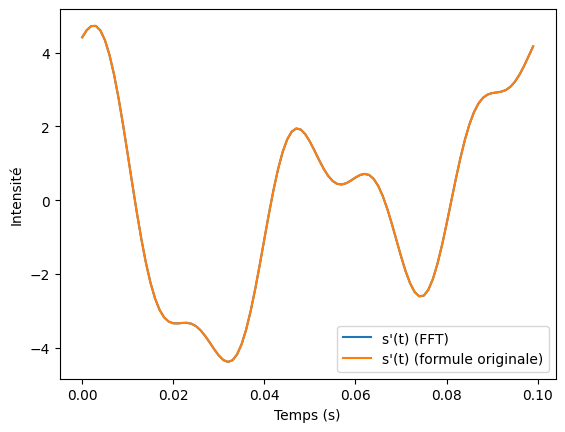

In [17]:
# A COMPLETER
# FFT inverse réelle de S'(f)
s_prime = np.fft.irfft(S_prime)

# Construction de s'(t) à partir de la formule originale
s_prime_reel = A*np.sin(2*np.pi*f0*t) + B*np.cos(2*np.pi*f1*t) + C*np.cos(2*np.pi*f2*t+np.pi/4)

# Tracé des deux signaux sur la même figure
plt.figure()
plt.plot(t,s_prime,label="s'(t) (FFT)")
plt.plot(t,s_prime_reel,label="s'(t) (formule originale)")
plt.legend()
plt.xlabel("Temps (s)")
plt.ylabel("Intensité")
plt.show()


---

## Exercice 5 : Oskour, mon audio est bruité !

J'ai fait un enregistrement d'une chanson que j'aime bien, mais je ne sais pas ce qu'il s'est passé, il y a un bruit ultra désagréable. Ca doit être un problème de larsen sûrement. Vous pouvez m'aider ?

Chargez le fichier *audio.wav*, et tracez le signal (avec le bon axe temporel hein !).

C:\Users\Robin\AppData\Local\Temp\ipykernel_492504\3971863886.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_audio, extrait_audio = wavfile.read("audio.wav")


Fréquence d'échantillonage de l'audio : 44100 Hz


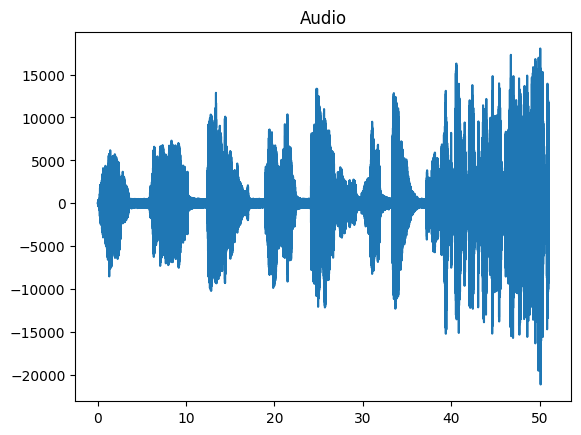

In [18]:
# A COMPLETER
# Chargement de l'extrait audio
from scipy.io import wavfile
freq_audio, extrait_audio = wavfile.read("audio.wav")
print(f"Fréquence d'échantillonage de l'audio : {freq_audio} Hz")

# Reconstruction de l'axe temporel
t_extrait_audio = np.arange(0, len(extrait_audio)/freq_audio, 1/freq_audio)

# Tracé du signal audio
plt.plot(t_extrait_audio, extrait_audio)
plt.title("Audio")
plt.show()

**_QUESTION :_** A l'écoute de l'audio, que constatez-vous ? A quoi ressemble le bruit ? 

**_REPONSE :_** A l'écoute de l'audio, on entend un bruit très aigu, comme un sifflement. Le bruit est constant tout au long de l'audio, et doit être probablement d'une fréquence unique.

Effectuez une FFT sur votre audio pour obtenir $A(f)$ et affichez uniquement l'amplitude fréquentielle. 

*Note : notre signal est réel, donc choisissez les bonnes fonctions...*

*Note 2 : La fonction stem peut prendre beaucoup de temps. Vous pouvez la remplacer par plot pour être plus efficace*

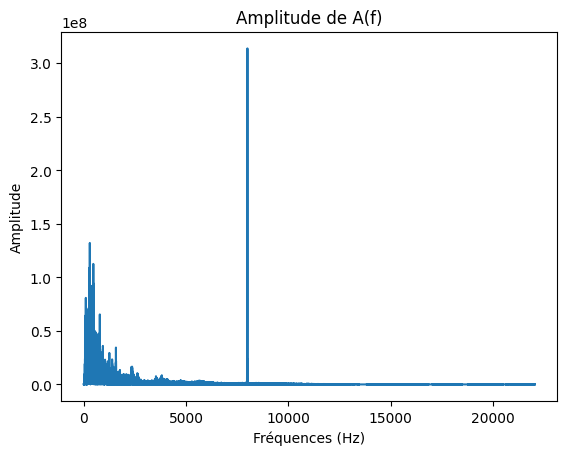

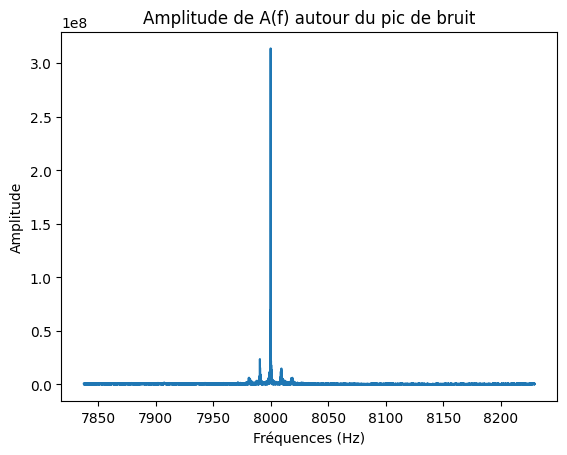

In [19]:
# A COMPLETER
# Transformée de Fourier réelle du signal de l'audio
A = np.fft.rfft(extrait_audio) # Calcul de la FFT réelle du signal
freq_A = np.fft.rfftfreq(len(t_extrait_audio),1/freq_audio) # Calcul de l'axe fréquentiel de la FFT

amplitude_A = np.abs(A) # Récupération de l'amplitude de A

plt.plot(freq_A, amplitude_A)
plt.title("Amplitude de A(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.show()

plt.plot(freq_A[400000:420000], amplitude_A[400000:420000])
plt.title("Amplitude de A(f) autour du pic de bruit")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.show()

**_QUESTION :_** Que constatez-vous sur le spectre d'amplitude ?

**_REPONSE :_** On constate un pic anormalement haut à environ 8000 Hz. Ce pic est sans doute le bruit. Si on zoome sur la zone, on voit également quelques pics alentours plus réduits, probablement dûs à une fuite spectrale, comme vu dans l'exercice précédent.

Récupérez la fréquence du bruit à partir des vecteurs créés (non, vous ne l'estimez pas tout seul à partir du graphique...)

In [20]:
# A COMPLETER
# Récupération de le la fréquence du bruit
indices_noise_freq = np.argmax(amplitude_A) # On récupère l'indice de l'amplitude maximum obtenue, correspondant au bruit
noise_freq = freq_A[indices_noise_freq] # On récupère la fréquence correspondante

print(f"Fréquence du bruit : {noise_freq} Hz")

Fréquence du bruit : 7999.9736080231605 Hz


Eliminez le bruit identifié en mettant les valeurs de $A(f)$ à zéro à l'endroit aux fréquences identifiées comme celles correspondant au bruit. Affichez de nouveau le spectre d'amplitude de $A(f)$ corrigé.

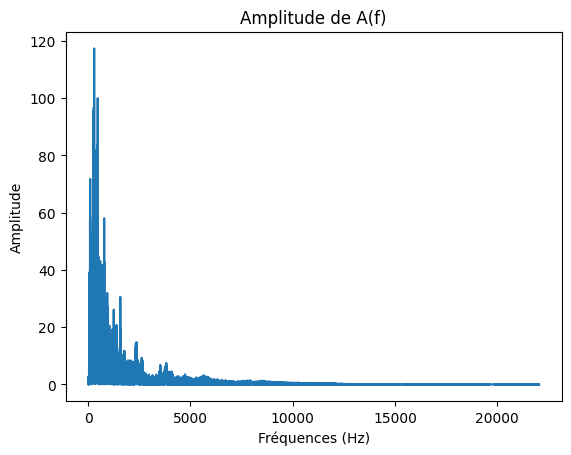

In [21]:
# A COMPLETER
# Mise à zéro de A(f) aux alentours du pic du bruit
# Le bruit étant situé à 8000 Hz, on va mettre A(f) à 0 là où 7950 Hz < f < 8050 Hz
A[np.logical_and(freq_A>7950,freq_A<8050)] = 0

amplitude_A = np.abs(A)*2/len(t_extrait_audio) # Récupération de l'amplitude de A corrigée

plt.figure()
plt.plot(freq_A, amplitude_A)
plt.title("Amplitude de A(f)")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Amplitude")
plt.show()

Effectuez la transformée de Fourier inverse pour retrouver le signal temporel corrigé, et tracez le signal de l'audio corrigé.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


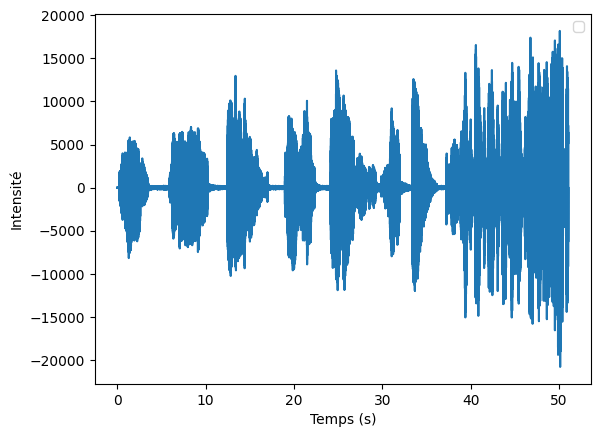

In [22]:
# A COMPLETER
# Transformée de Fourier inverse réelle du signal A(f)
audio_corrige = np.fft.irfft(A)

# Affichage du signal s(t) d'origine et celui après transformée de Fourier inverse
plt.figure()
plt.plot(t_extrait_audio,audio_corrige)
plt.legend()
plt.xlabel("Temps (s)")
plt.ylabel("Intensité")
plt.show()

Dernière étape : exportez votre audio corrigé.

In [23]:
# A COMPLETER
# Export du meilleur extrait en fichier WAV
wavfile.write("audio_corrige.wav",freq_audio,audio_corrige.astype(np.int16))

**_QUESTION :_** A l'écoute, comment est l'audio corrigé ? Avez-vous résolu le problème ? Est-ce que l'audio principal est impacté ?

**_REPONSE :_** L'audio exporté est corrigé, on n'entend plus du tout le bruit. L'audio principal n'est pas impacté au final, le bruit étant très distinct de la musique au niveau des fréquences.